In [ ]:
import os
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from mne.io import read_epochs_eeglab
from mne import read_events
import scipy

In [51]:
obs_epo = [1,2,3,4,5]
exe_epo = [6,7,8,9,10]

In [ ]:
freqs = np.arange(4, 100, 0.5)
lags=np.arange(0.1,4.5,.05)

In [ ]:
obs_epo = [1,2,3,4,5]
exe_epo = [6,7,8,9,10]
ages=['9m','12m','adult']
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Plot lc_obs_avg_all
plt.figure(figsize=(21,3))
i = 0
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_obs_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_hilbert_obs_noavg_allsub_epo_{}.npy'.format(epo))
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_obs_avg_allepo.append(lc_obs_avg)
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_hilbert_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_obs_avg_allepo.append(lc_exe_avg)
        
    lc_obs_avg=np.mean(lc_obs_avg_allepo, axis=0)

    fig = plt.figure()
    i = i+1
    ax=plt.subplot(1,1,i)
    i1=ax.imshow(lc_obs_avg, aspect='auto', cmap='plasma',
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
              origin='lower')
    cb=plt.colorbar(i1, label='lc')
    ax.set_xlabel('lag (cycles)')
    ax.set_ylabel('frequency (Hz)')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.datasets import sample
from mne.stats import f_mway_rm, f_threshold_mway_rm, fdr_correction
from mne.time_frequency import tfr_morlet

n_conditions = 10
factor_levels = [2, 5]  # number of levels in each factor

def stat_fun(*args):
    return f_mway_rm(
        np.swapaxes(args, 1, 0),
        factor_levels=factor_levels,
        effects=effects,
        return_pvals=False,
    )[0]

stat_fun(H1): min=0.003319 max=9.117126
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

1
2
3
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
stat_fun(H1): min=0.052595 max=26.730806
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

1
2
3
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 13 clusters


/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/mne/stats/parametric.py:394: RuntimeWarning: invalid value encountered in divide
  fvals = ss / mse


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

1
2
3
4
5
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


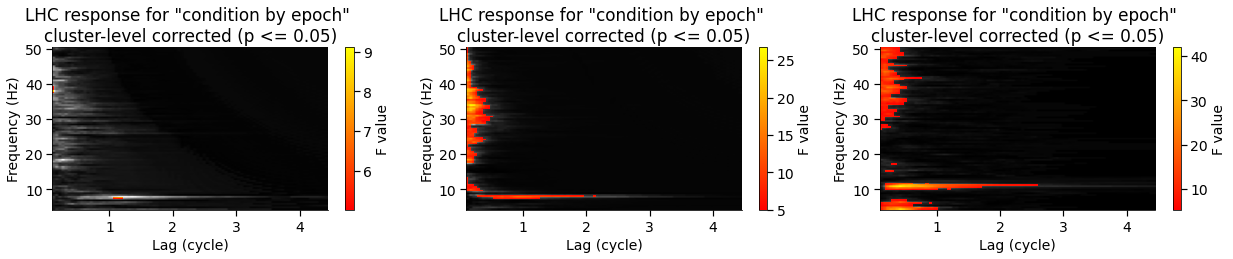

In [19]:
obs_epo = [1,2,3,4,5]
exe_epo = [6,7,8,9,10]

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Plot lc_obs_avg_all
plt.figure(figsize=(21,3))

j = 0

ages = ['9m']
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_obs_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_avg_allepo.append(lc_obs_avg)
        
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_avg_allepo.append(lc_exe_avg)
    
    lc_avg_allepo = np.array(lc_avg_allepo)
    lc_avg_allepo = lc_avg_allepo[:,:,0:93,:]
    n_replications = lc_avg_allepo.shape[1]
    

    effects = "A:B"
    # The ANOVA returns a tuple f-values and p-values, we will pick the former.
    pthresh = 0.001  # set threshold rather high to save some time
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, pthresh)
    tail = 1  # f-test, so tail > 0
    n_permutations = 1024  # Save some time (the test won't be too sensitive ...)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        lc_avg_allepo,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=tail,
        n_jobs=None,
        n_permutations=n_permutations,
        buffer_size=None,
        out_type="mask",
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    ar = clusters[good_clusters[0]]
    for i in range(1,len(good_clusters)):
        print(i)
        ar = np.logical_or.reduce([ar,clusters[good_clusters[i]]])
    print(ar)
    
    F_obs_plot = F_obs.copy()
    F_obs_plot[~ar] = np.nan
    
    
    j = j+1
    ax=plt.subplot(1,3,j)
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
        f_image,
        cmap=cmap,
        aspect="auto",
        origin="lower",
        extent=[lags[0], lags[-1], freqs[0], freqs[93]],
        )
    cb = plt.colorbar(c, label='F value')
    ax.set_xlabel("Lag (cycle)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(
    f'LHC response for "condition by epoch" \n'
    "cluster-level corrected (p <= 0.05)"
    )
    
ages = ['12m']
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_obs_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_avg_allepo.append(lc_obs_avg)
        
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_avg_allepo.append(lc_exe_avg)
    
    lc_avg_allepo = np.array(lc_avg_allepo)
    lc_avg_allepo = lc_avg_allepo[:,:,0:93,:]
    n_replications = lc_avg_allepo.shape[1]
    

    effects = "A:B"
    # The ANOVA returns a tuple f-values and p-values, we will pick the former.
    pthresh = 0.001  # set threshold rather high to save some time
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, pthresh)
    tail = 1  # f-test, so tail > 0
    n_permutations = 1024  # Save some time (the test won't be too sensitive ...)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        lc_avg_allepo,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=tail,
        n_jobs=None,
        n_permutations=n_permutations,
        buffer_size=None,
        out_type="mask",
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    ar = clusters[good_clusters[0]]
    for i in range(1,len(good_clusters)):
        print(i)
        ar = np.logical_or.reduce([ar,clusters[good_clusters[i]]])
    print(ar)
    
    F_obs_plot = F_obs.copy()
    F_obs_plot[~ar] = np.nan
    
    
    j = j+1
    ax=plt.subplot(1,3,j)
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
        f_image,
        cmap=cmap,
        aspect="auto",
        origin="lower",
        extent=[lags[0], lags[-1], freqs[0], freqs[93]],
        )
    cb = plt.colorbar(c, label='F value')
    ax.set_xlabel("Lag (cycle)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(
    f'LHC response for "condition by epoch" \n'
    "cluster-level corrected (p <= 0.05)"
    )
    
ages = ['adult']
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_obs_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_avg_allepo.append(lc_obs_avg)
        
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_avg_allepo.append(lc_exe_avg)
    
    lc_avg_allepo = np.array(lc_avg_allepo)
    lc_avg_allepo = lc_avg_allepo[:,:,0:93,:]
    n_replications = lc_avg_allepo.shape[1]
    

    effects = "A:B"
    # The ANOVA returns a tuple f-values and p-values, we will pick the former.
    pthresh = 0.001  # set threshold rather high to save some time
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, pthresh)
    tail = 1  # f-test, so tail > 0
    n_permutations = 1024  # Save some time (the test won't be too sensitive ...)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        lc_avg_allepo,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=tail,
        n_jobs=None,
        n_permutations=n_permutations,
        buffer_size=None,
        out_type="mask",
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    ar = clusters[good_clusters[0]]
    for i in range(1,len(good_clusters)):
        print(i)
        ar = np.logical_or.reduce([ar,clusters[good_clusters[i]]])
    print(ar)
    
    F_obs_plot = F_obs.copy()
    F_obs_plot[~ar] = np.nan
    F_obs[np.isnan(F_obs)] = 0
    j = j+1
    ax=plt.subplot(1,3,j)
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
        f_image,
        cmap=cmap,
        aspect="auto",
        origin="lower",
        extent=[lags[0], lags[-1], freqs[0], freqs[93]],
        )
    cb = plt.colorbar(c, label='F value')
    ax.set_xlabel("Lag (cycle)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(
    f'LHC response for "condition by epoch" \n'
    "cluster-level corrected (p <= 0.05)"
    )
plt.savefig('Fig5d_infants.svg', format='svg')

stat_fun(H1): min=0.009434 max=4.006106
Running initial clustering …
Found 0 clusters
stat_fun(H1): min=0.027658 max=12.427407
Running initial clustering …
Found 9 clusters


/tmp/ipykernel_31491/632143251.py:49: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

1
2
3
4
5
6
7
8
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True False  True ... False False False]
 [ True False  True ... False False False]
 [ True False  True ... False False False]]
stat_fun(H1): min=0.009169 max=46.479928
Running initial clustering …
Found 62 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

1
2
3
4
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True False  True ... False False False]]


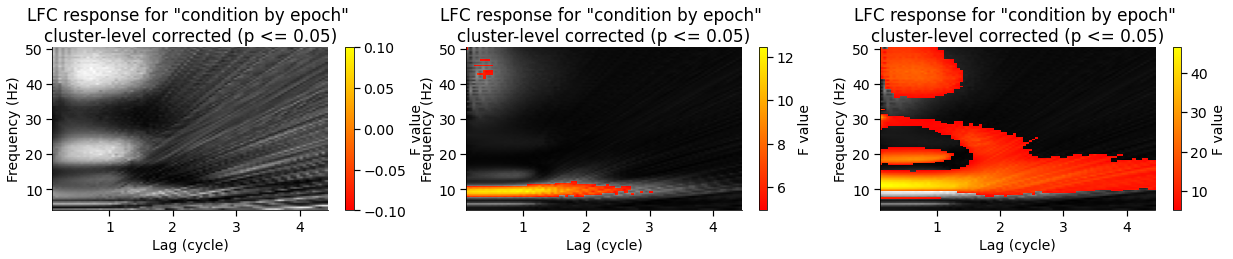

In [125]:
obs_epo = [1,2,3,4,5]
exe_epo = [6,7,8,9,10]

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Plot lc_obs_avg_all
plt.figure(figsize=(21,3))

j = 0

ages = ['9m']
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_classic_obs_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_avg_allepo.append(lc_obs_avg)
        
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_classic_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_avg_allepo.append(lc_exe_avg)
    
    lc_avg_allepo = np.array(lc_avg_allepo)
    lc_avg_allepo = lc_avg_allepo[:,:,0:93,:]
    n_replications = lc_avg_allepo.shape[1]
    

    effects = "A:B"
    # The ANOVA returns a tuple f-values and p-values, we will pick the former.
    pthresh = 0.001  # set threshold rather high to save some time
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, pthresh)
    tail = 1  # f-test, so tail > 0
    n_permutations = 1024  # Save some time (the test won't be too sensitive ...)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        lc_avg_allepo,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=tail,
        n_jobs=None,
        n_permutations=n_permutations,
        buffer_size=None,
        out_type="mask",
    )

    
    F_obs_plot = F_obs.copy()
    F_obs_plot[:,:] = np.nan
    
    
    j = j+1
    ax=plt.subplot(1,3,j)
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
        f_image,
        cmap=cmap,
        aspect="auto",
        origin="lower",
        extent=[lags[0], lags[-1], freqs[0], freqs[93]],
        )
    cb = plt.colorbar(c, label='F value')
    ax.set_xlabel("Lag (cycle)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(
    f'LFC response for "condition by epoch" \n'
    "cluster-level corrected (p <= 0.05)"
    )
    
ages = ['12m']
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_classic_obs_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_avg_allepo.append(lc_obs_avg)
        
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_classic_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_avg_allepo.append(lc_exe_avg)
    
    lc_avg_allepo = np.array(lc_avg_allepo)
    lc_avg_allepo = lc_avg_allepo[:,:,0:93,:]
    n_replications = lc_avg_allepo.shape[1]
    

    effects = "A:B"
    # The ANOVA returns a tuple f-values and p-values, we will pick the former.
    pthresh = 0.001  # set threshold rather high to save some time
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, pthresh)
    tail = 1  # f-test, so tail > 0
    n_permutations = 1024  # Save some time (the test won't be too sensitive ...)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        lc_avg_allepo,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=tail,
        n_jobs=None,
        n_permutations=n_permutations,
        buffer_size=None,
        out_type="mask",
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    ar = clusters[good_clusters[0]]
    for i in range(1,len(good_clusters)):
        print(i)
        ar = np.logical_or.reduce([ar,clusters[good_clusters[i]]])
    print(ar)
    
    F_obs_plot = F_obs.copy()
    F_obs_plot[~ar] = np.nan
    
    j = j+1
    ax=plt.subplot(1,3,j)
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
        f_image,
        cmap=cmap,
        aspect="auto",
        origin="lower",
        extent=[lags[0], lags[-1], freqs[0], freqs[93]],
        )
    cb = plt.colorbar(c, label='F value')
    ax.set_xlabel("Lag (cycle)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(
    f'LFC response for "condition by epoch" \n'
    "cluster-level corrected (p <= 0.05)"
    )
    
ages = ['adult']
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    lc_avg_allepo = []
    
    for epo in obs_epo:            
        subject_data_fname_obs = op.join(out_path, 'lc_classic_obs_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_avg_allepo.append(lc_obs_avg)
        
    for epo in exe_epo:    
        subject_data_fname_exe = op.join(out_path, 'lc_classic_exe_noavg_allsub_epo_{}.npy'.format(epo))                   
        lc_exe_avg = np.load(subject_data_fname_exe)    
        lc_avg_allepo.append(lc_exe_avg)
    
    lc_avg_allepo = np.array(lc_avg_allepo)
    lc_avg_allepo = lc_avg_allepo[:,:,0:93,:]
    n_replications = lc_avg_allepo.shape[1]
    

    effects = "A:B"
    # The ANOVA returns a tuple f-values and p-values, we will pick the former.
    pthresh = 0.001  # set threshold rather high to save some time
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, pthresh)
    tail = 1  # f-test, so tail > 0
    n_permutations = 1024  # Save some time (the test won't be too sensitive ...)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        lc_avg_allepo,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=tail,
        n_jobs=None,
        n_permutations=n_permutations,
        buffer_size=None,
        out_type="mask",
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    ar = clusters[good_clusters[0]]
    for i in range(1,len(good_clusters)):
        print(i)
        ar = np.logical_or.reduce([ar,clusters[good_clusters[i]]])
    print(ar)
    
    F_obs_plot = F_obs.copy()
    F_obs_plot[~ar] = np.nan
    
    j = j+1
    ax=plt.subplot(1,3,j)
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
        f_image,
        cmap=cmap,
        aspect="auto",
        origin="lower",
        extent=[lags[0], lags[-1], freqs[0], freqs[93]],
        )
    cb = plt.colorbar(c, label='F value')
    ax.set_xlabel("Lag (cycle)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(
    f'LFC response for "condition by epoch" \n'
    "cluster-level corrected (p <= 0.05)"
    )
plt.savefig('Fig3d_infants_classic.svg', format='svg')

stat_fun(H1): min=-4.925966 max=3.675319
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-4.691465 max=4.380271
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-4.751053 max=4.709438
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

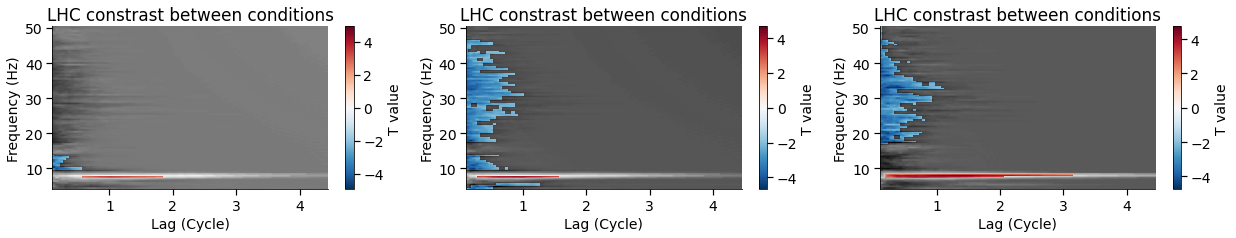

In [63]:
import numpy as np
from mne.stats import permutation_cluster_test
from mne.stats import ttest_ind_no_p


obs_epo = [3,4,5]
ages = ['12m']
lc_avg_allepo = []

# Plot lc_obs_avg_all
plt.figure(figsize=(21,3))
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})
j=0
for age in ages:
    for epo in obs_epo:
    
        out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
        subject_data_fname_obs = op.join(out_path, 'lc_obs_noavg_allsub_epo_{}.npy'.format(epo))
                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_obs_avg = lc_obs_avg[:,0:93,:]
        
        epo_exe = epo+5
        
        subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo_exe))
                   
        lc_exe_avg = np.load(subject_data_fname_exe)
        lc_exe_avg = lc_exe_avg[:,0:93,:]
        #lc_avg_allepo.append(lc_obs_avg)


        # Perform permutation cluster test with custom stat_fun
        T_obs, clusters, cluster_p_values, _ = permutation_cluster_test(
            [lc_obs_avg, lc_exe_avg],
            n_permutations=1000,
            threshold=2.0,
            tail=0,
            stat_fun=mne.stats.ttest_ind_no_p
        )
        
        j=j+1
     
        ax=plt.subplot(1,3,j)
        
        # Create new stats image with only significant clusters
        T_obs_plot = np.nan * np.ones_like(T_obs)
        for c, p_val in zip(clusters, cluster_p_values):
            if p_val <= 0.05:
                #if np.all(signs[c]<0):
                T_obs_plot[c] = T_obs[c] 
                    #print(p_val)
                    #print(F_obs_plot[~np.isnan(F_obs_plot)].shape)
                    #print(np.mean(F_obs_plot[~np.isnan(F_obs_plot)]))
                    #print(np.mean(F_obs[~np.isnan(F_obs)]))
                    #print(np.mean(lc_obs_avgsub[c]))
                    #print(np.mean(lc_exe_avgsub[c]))
                    
        T_obs[np.isnan(T_obs)] = 0            
        ax.imshow(
            T_obs,
            extent=[lags[0], lags[-1], freqs[0], freqs[93]],
            aspect="auto",
            origin="lower",
            cmap="gray",
        )
        
        max_T = np.nanmax(abs(T_obs_plot))
        i1 =ax.imshow(
            T_obs_plot,
            extent=[lags[0], lags[-1], freqs[0], freqs[93]],
            aspect="auto",
            origin="lower",
            cmap="RdBu_r",
            vmin=-max_T,
            vmax=max_T,
         )
        cb = plt.colorbar(i1, label='T value')
        ax.set_xlabel("Lag (Cycle)")
        ax.set_ylabel("Frequency (Hz)")
        ax.set_title(f"LHC constrast between conditions")
        
plt.savefig('Fig3g_infants.svg', format='svg')        
 

In [18]:
import numpy as np
from mne.stats import permutation_cluster_test
from mne.stats import ttest_ind_no_p 

stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 19 clusters


<ipython-input-26-1a123aa0a005>:24: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, _ = permutation_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 11 clusters


<ipython-input-26-1a123aa0a005>:24: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, _ = permutation_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 24 clusters


<ipython-input-26-1a123aa0a005>:24: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, _ = permutation_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

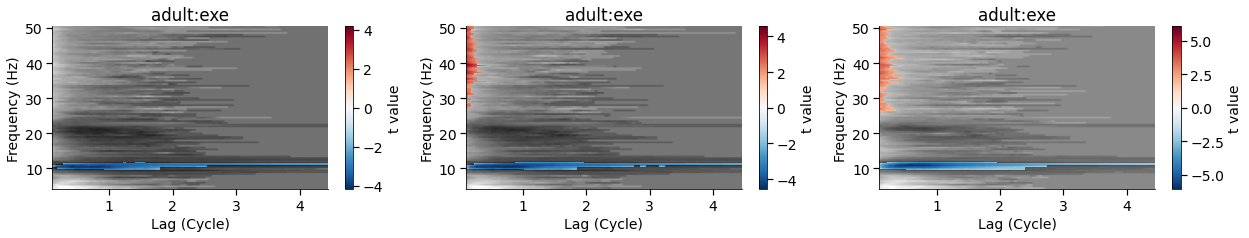

In [26]:
exe_epo = [8,9,10]
ages = ['adult']

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Plot lc_obs_avg_all
plt.figure(figsize=(21,3))

j=0
for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    epo = 6
    subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo))
                   
    lc_exe_base = np.load(subject_data_fname_exe)
    lc_exe_base = lc_exe_base[:,0:93,:]
    for epo in exe_epo:

        subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo))
                   
        lc_exe_avg = np.load(subject_data_fname_exe)
        lc_exe_avg = lc_exe_avg[:,0:93,:]
        
 # Perform permutation cluster test with custom stat_fun
        T_obs, clusters, cluster_p_values, _ = permutation_cluster_test(
            [lc_exe_avg, lc_exe_base],
            n_permutations=1000,
            threshold=2.0,
            tail=0,
            stat_fun=ttest_ind_no_p
        )
        
        j=j+1
     
        ax=plt.subplot(1,3,j)

        # Create new stats image with only significant clusters
        T_obs_plot = np.nan * np.ones_like(T_obs)
        for c, p_val in zip(clusters, cluster_p_values):
            if p_val <= 0.05:
                #if np.all(signs[c]<0):
                T_obs_plot[c] = T_obs[c] 
                    #print(p_val)
                    #print(F_obs_plot[~np.isnan(F_obs_plot)].shape)
                    #print(np.mean(F_obs_plot[~np.isnan(F_obs_plot)]))
                    #print(np.mean(F_obs[~np.isnan(F_obs)]))
                    #print(np.mean(lc_obs_avgsub[c]))
                    #print(np.mean(lc_exe_avgsub[c]))
                    
        T_obs[np.isnan(T_obs)] = 0            
        ax.imshow(
            T_obs,
            extent=[lags[0], lags[-1], freqs[0], freqs[93]],
            aspect="auto",
            origin="lower",
            cmap="gray",
        )
        
        max_T = np.nanmax(abs(T_obs_plot))
        i1 =ax.imshow(
            T_obs_plot,
            extent=[lags[0], lags[-1], freqs[0], freqs[93]],
            aspect="auto",
            origin="lower",
            cmap="RdBu_r",
            vmin=-max_T,
            vmax=max_T,
         )
        cb = plt.colorbar(i1, label='t value')
        ax.set_xlabel("Lag (Cycle)")
        ax.set_ylabel("Frequency (Hz)")
        ax.set_title(f"adult:exe")
        
plt.savefig('Fig3i_infants.svg', format='svg')    